<a href="https://colab.research.google.com/github/anjali-ds-03/Deep-Learning/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#16May2025

Types of Activation Function:

1. Linear Function
2. Binary Step Function
3. Sigmoid Activation Function
4. RELU(Rectified Linear Unit)
5. Leaky Relu: improved version of relu.In relu the gradient is 0 for x<0
 which would deactivate the neuron.

6. Softmax



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


In [ ]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-6-61ba172ded39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT',data=data, palette=pal)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

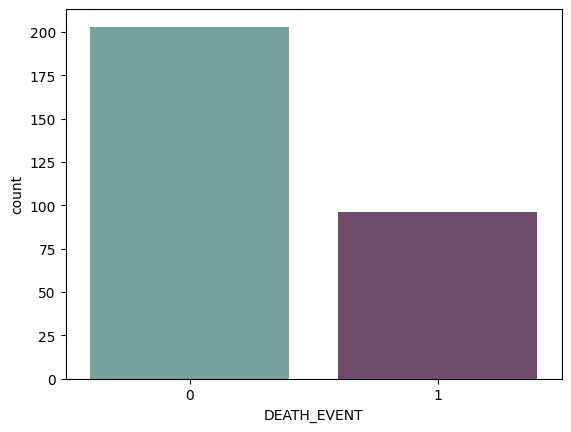

In [ ]:
pal = ["#6daa9f","#774571"]
sns.countplot(x='DEATH_EVENT',data=data, palette=pal)


<Axes: >

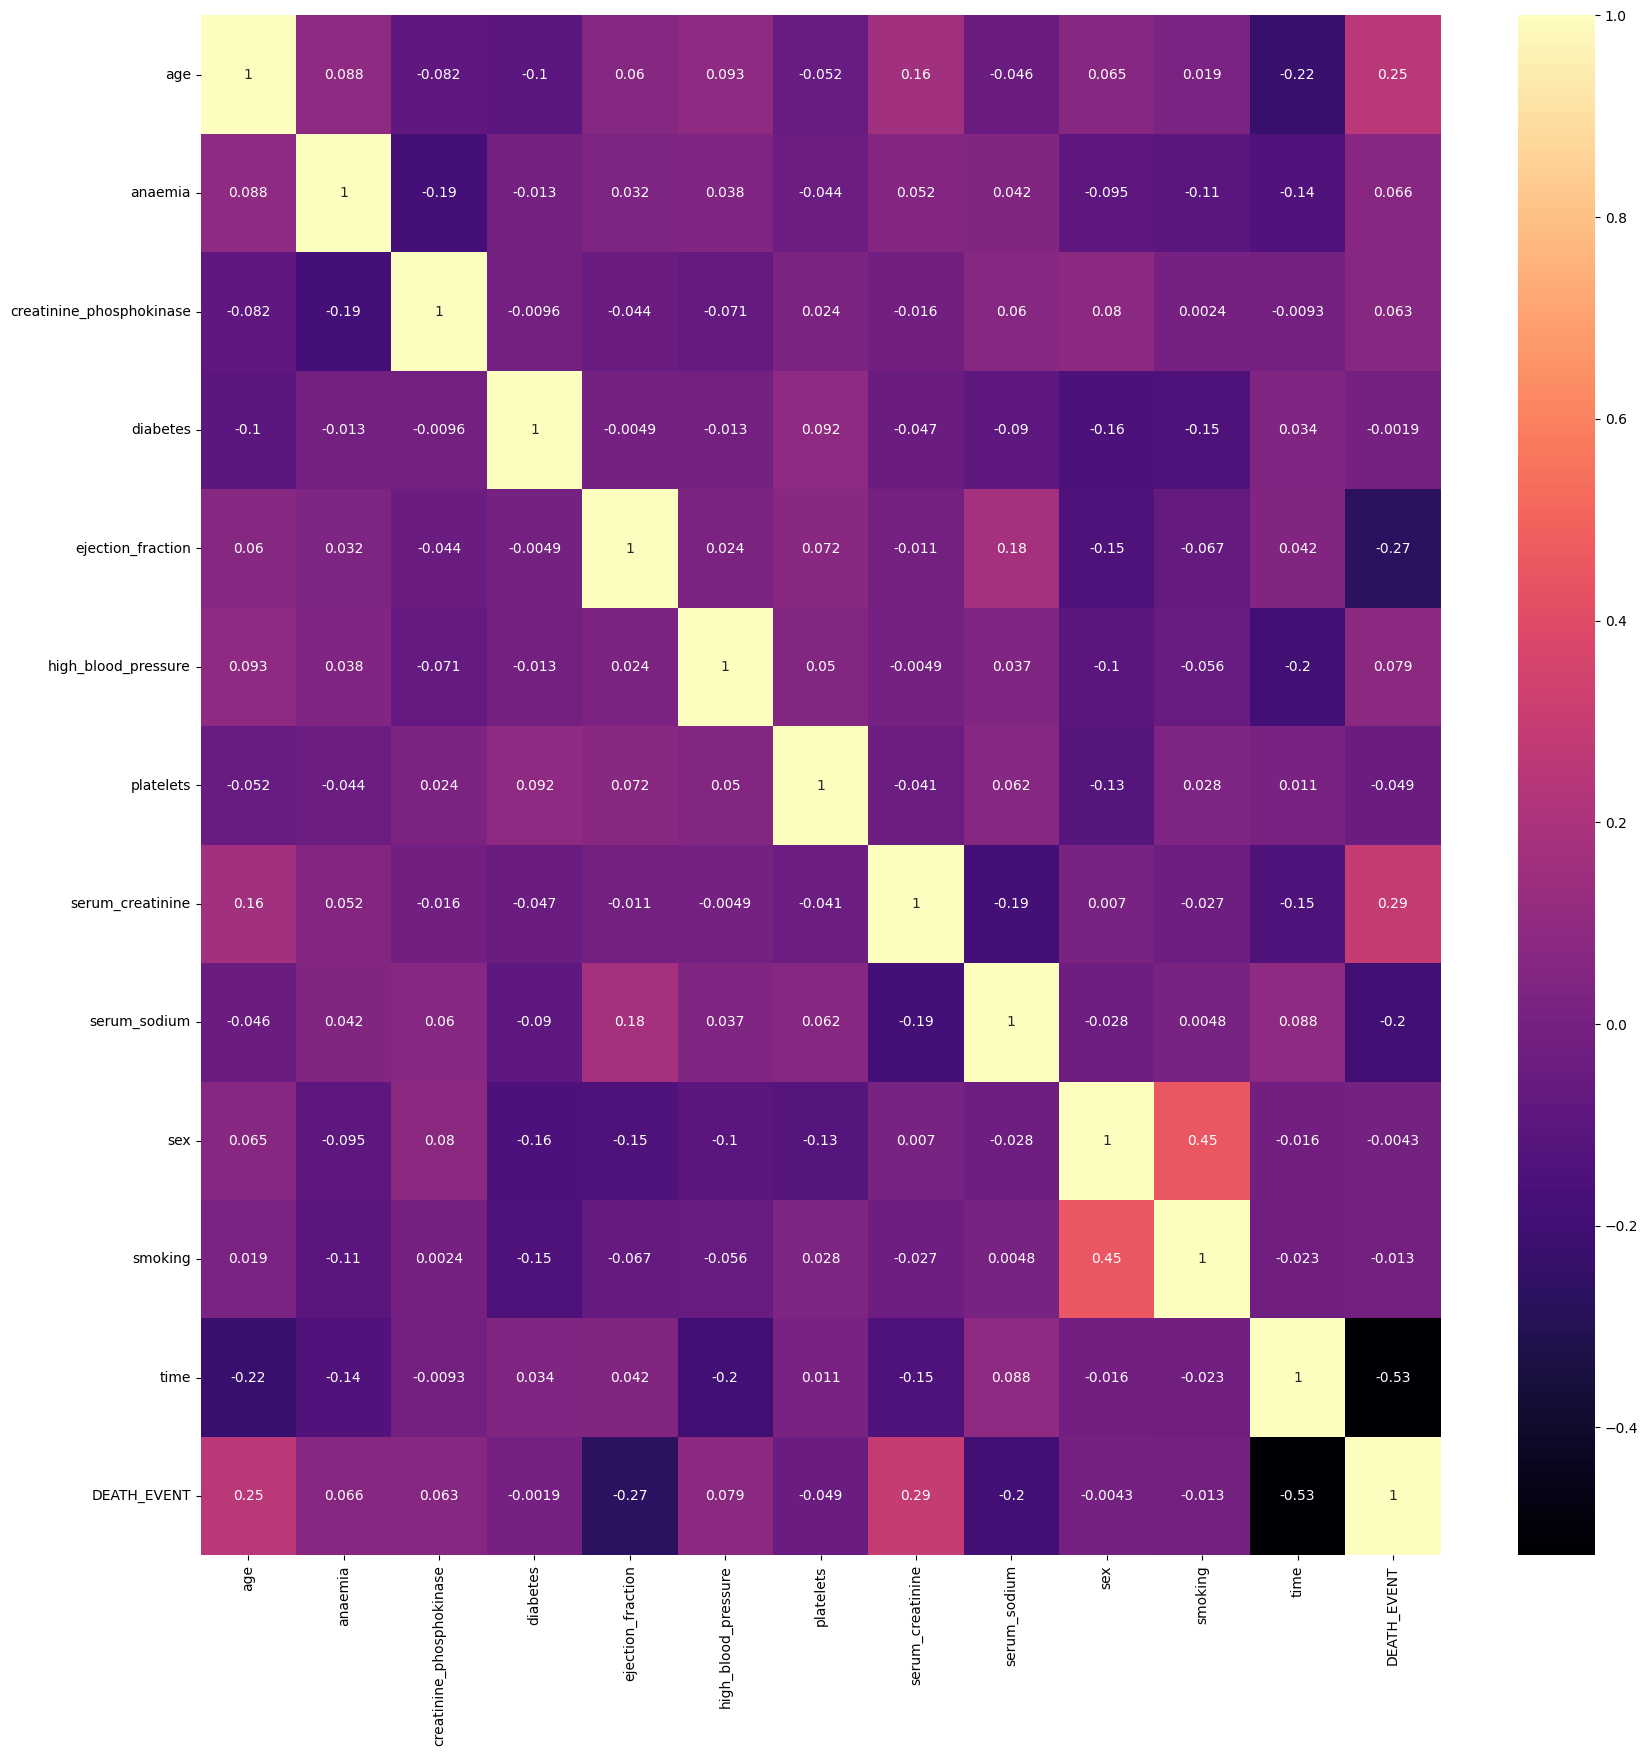

In [ ]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation , annot=True, cmap='magma')

<Axes: xlabel='age', ylabel='count'>

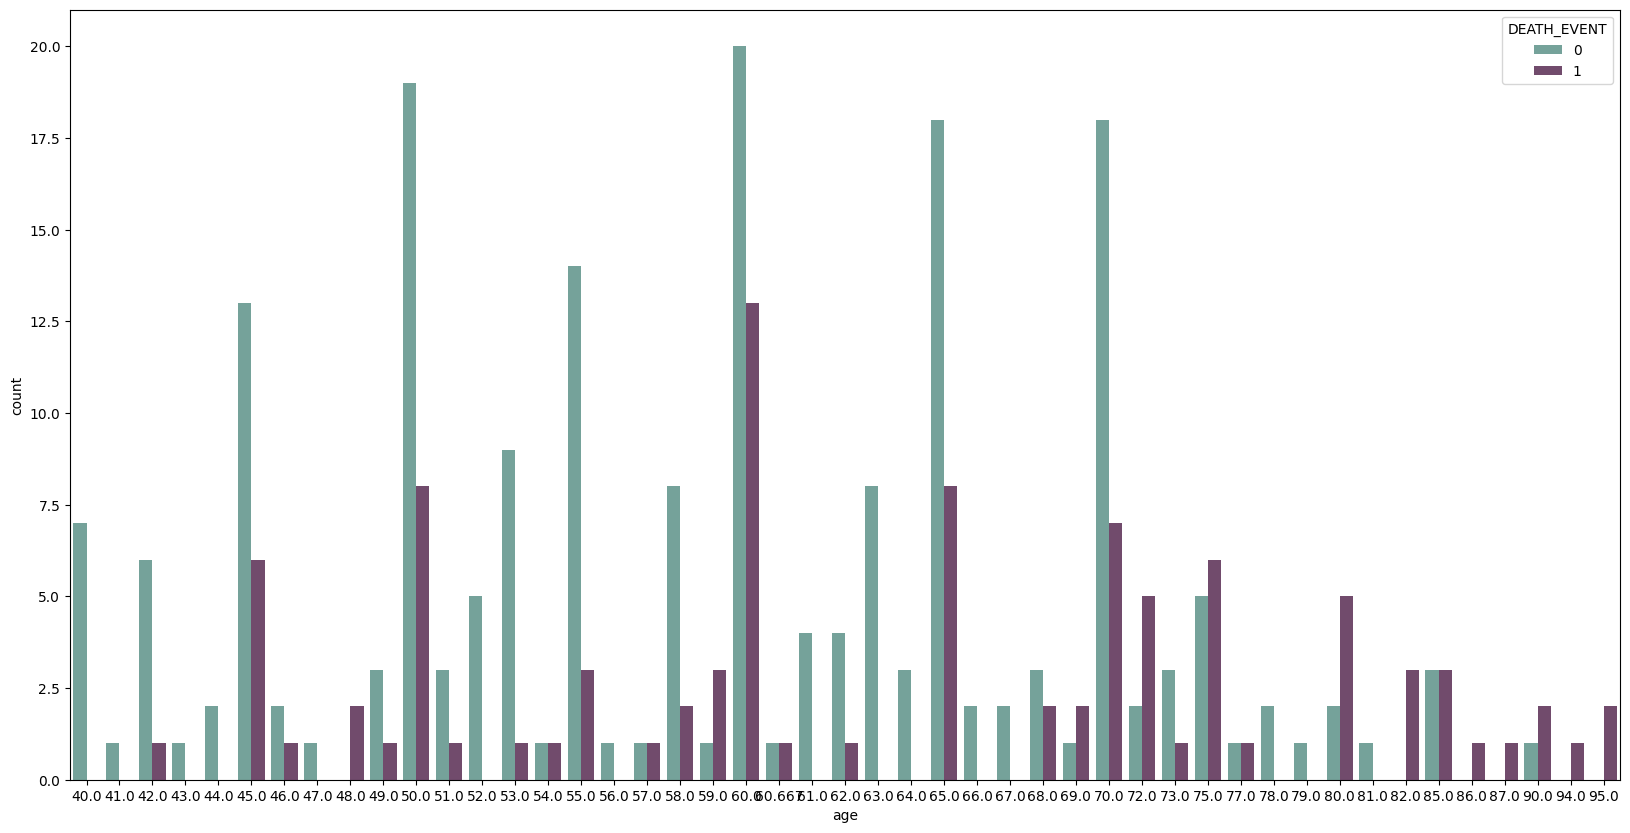

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'age', hue = 'DEATH_EVENT', data=data, palette=pal)

<Axes: xlabel='smoking', ylabel='count'>

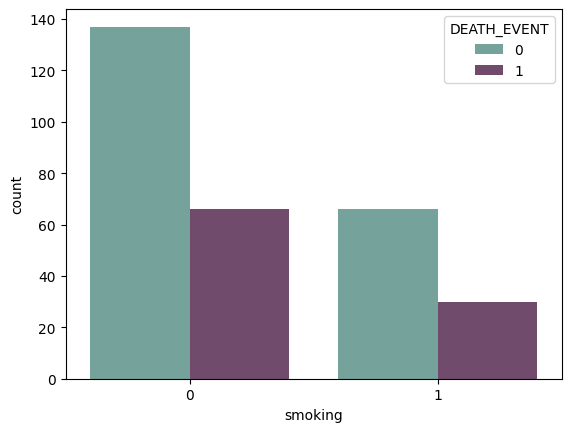

In [ ]:
sns.countplot(x='smoking', hue= 'DEATH_EVENT', data=data, palette=pal)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<ipython-input-16-de828c062e7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-de828c062e7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-de828c062e7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-de828c062e7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

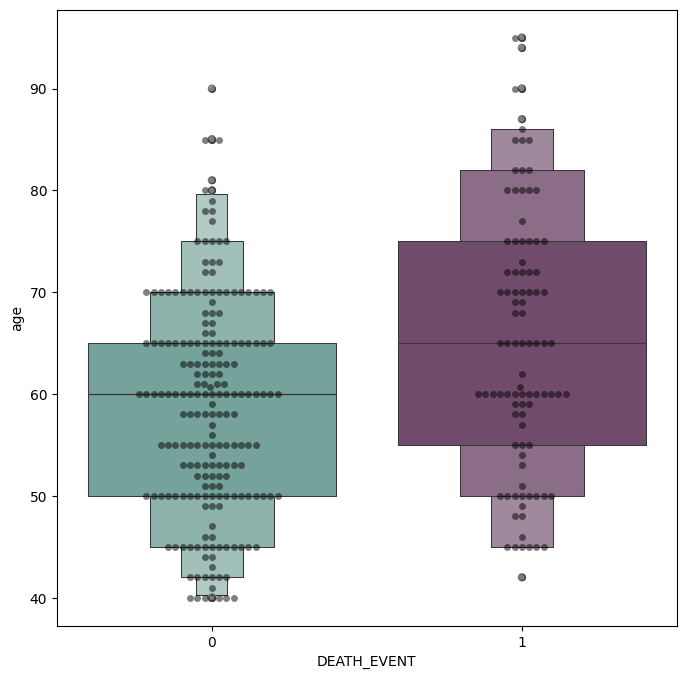

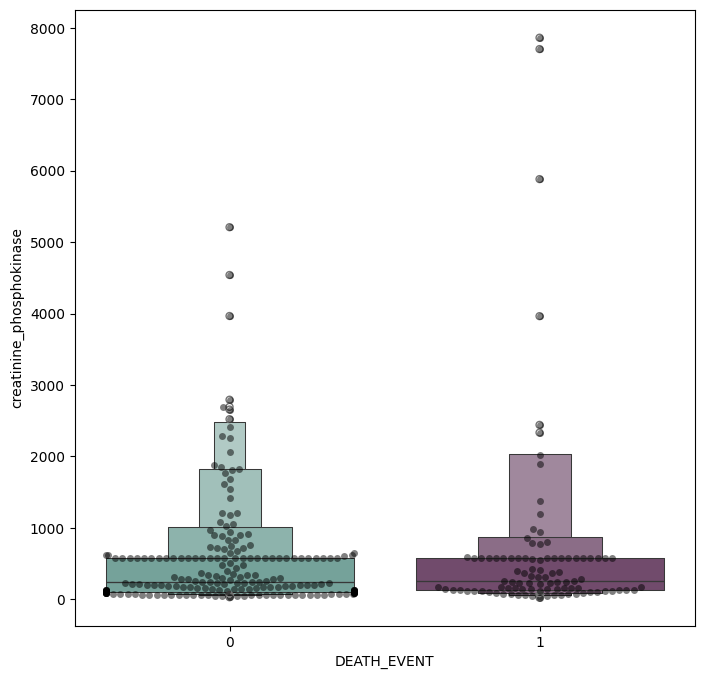

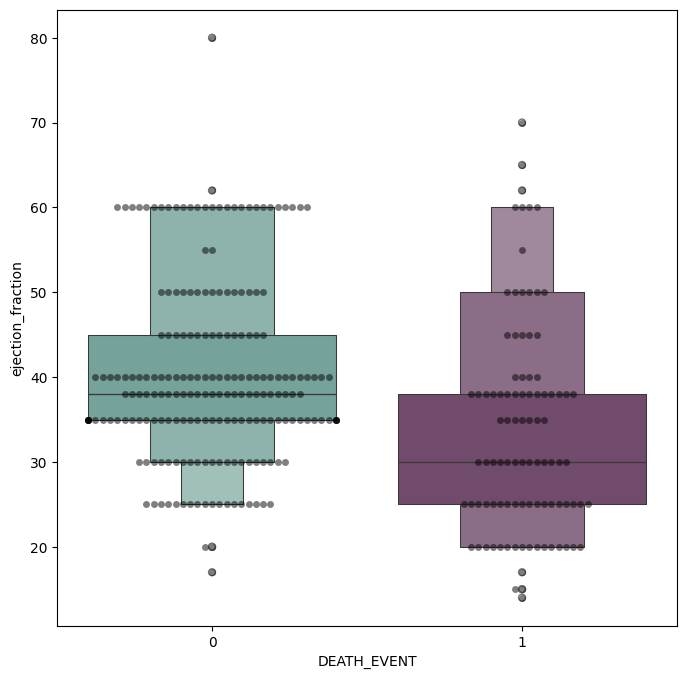

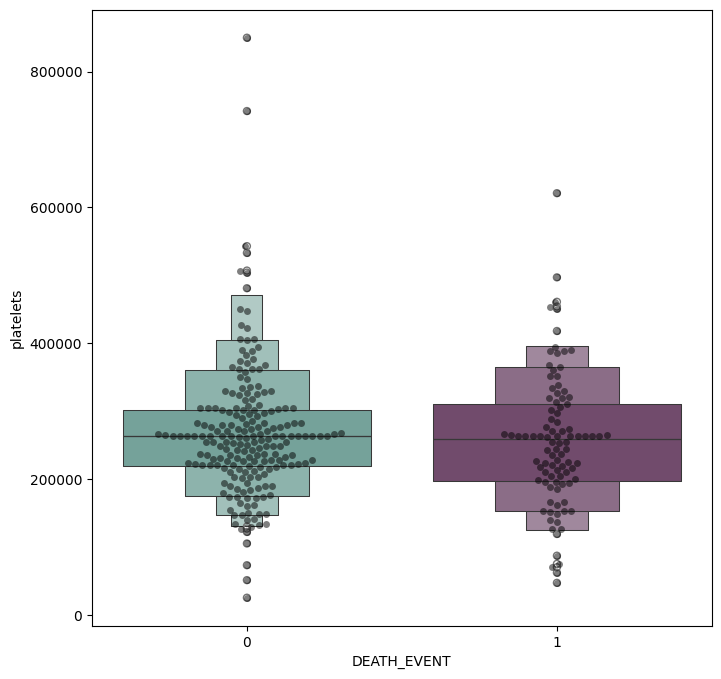

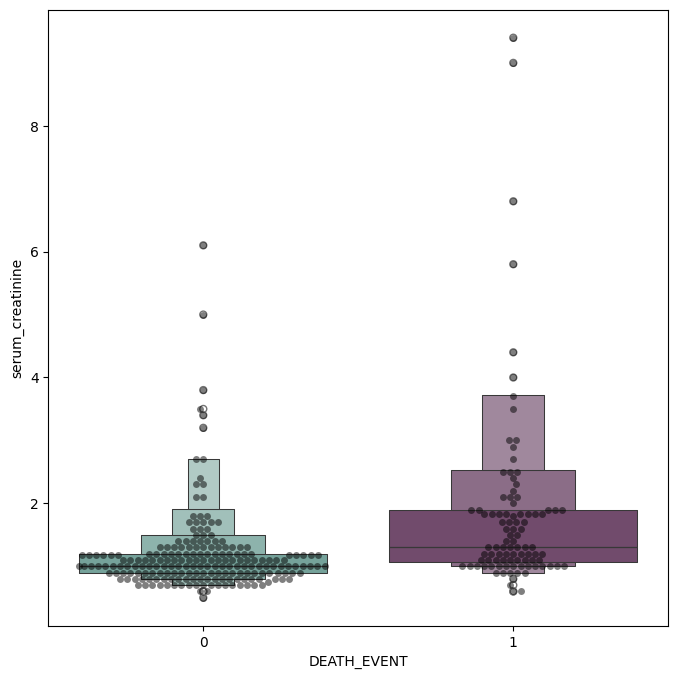

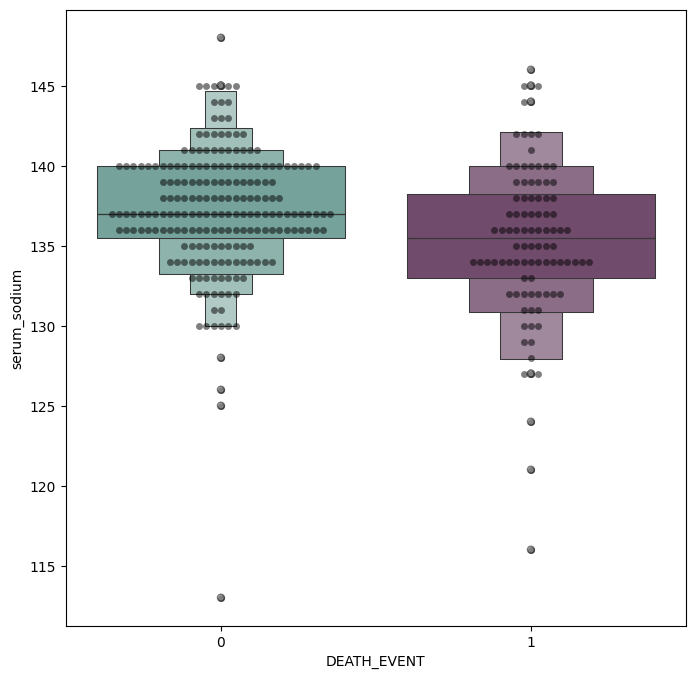

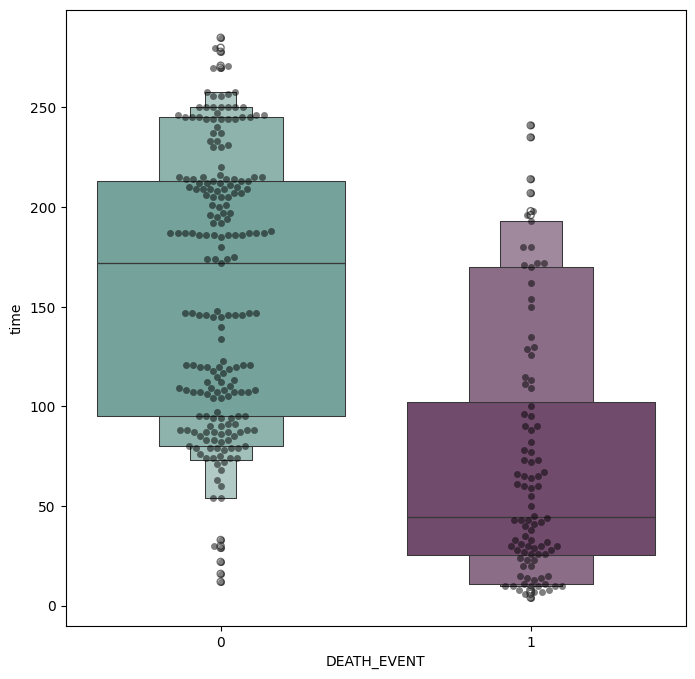

In [ ]:
feature=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for i in feature:
  plt.figure(figsize=(8,8))
  sns.swarmplot(x='DEATH_EVENT', y=i, data=data, color='black',alpha=0.5)
  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)

In [ ]:
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [ ]:
col_names=list(x.columns)
scaler=StandardScaler()
x_df=scaler.fit_transform(x)
x_df=pd.DataFrame(x_df,columns=col_names)


In [ ]:
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

model=Sequential()

model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,  epochs=500, validation_split=0.2,batch_size=35, callbacks=[early_stopping])

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6796 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.6915
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6853 - loss: 0.6917 - val_accuracy: 0.7500 - val_loss: 0.6899
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7061 - loss: 0.6902 - val_accuracy: 0.7500 - val_loss: 0.6881
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6880 - loss: 0.6890 - val_accuracy: 0.7500 - val_loss: 0.6862
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6783 - loss: 0.6881 - val_accuracy: 0.7500 - val_loss: 0.6843
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7294 - loss: 0.6846 - val_accuracy: 0.7500 - val_loss: 0.6820
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7241 - loss: 0.6827 - val_accuracy: 0.7500 - val_loss: 0.6794
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7312 - loss: 0.6800 - val_accuracy: 0.7500 - val_loss:

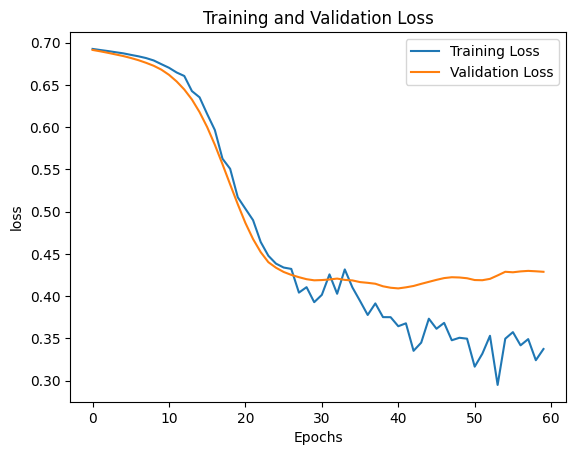

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']], label='Training Loss')
plt.plot(history_df.loc[:,['val_loss']], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

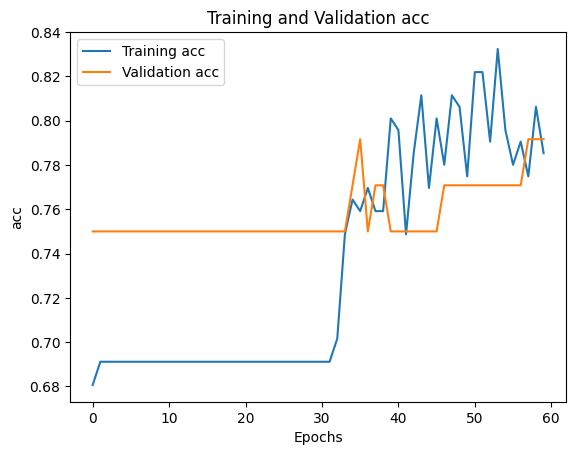

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['accuracy']], label='Training acc')
plt.plot(history_df.loc[:,['val_accuracy']], label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        35
           1       0.83      0.40      0.54        25

    accuracy                           0.72        60
   macro avg       0.76      0.67      0.67        60
weighted avg       0.75      0.72      0.69        60

